In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.ticker as ticker

import lazypredict

from lazypredict.Supervised import LazyRegressor

import seaborn as sns

train_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e6/train.csv")
test_df=pd.read_csv("C:/Users/pfali/Downloads/playground-series-s3e6/test.csv")

Preview first 5 rows, data types, describe data, check for null values.

In [2]:
train_df.head()

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,0,34291,24,1,0,47,35693,2,1,2000,0,1,8,5196,369,0,3,3436795.20
1,1,95145,60,0,1,60,34773,1,4,2000,0,1,729,4496,277,0,6,9519958.00
2,2,92661,45,1,1,62,45457,4,8,2020,1,1,7473,8953,245,1,9,9276448.10
3,3,97184,99,0,0,59,15113,1,1,2000,0,1,6424,8522,256,1,9,9725732.20
4,4,61752,100,0,0,57,64245,8,4,2018,1,0,7151,2786,863,0,7,6181908.80


In [3]:
train_df.describe(include='all')

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00
mean,11364.50,46586.22,48.24,0.48,0.45,47.31,50013.80,5.59,5.62,2008.01,0.47,0.46,5283.65,5067.98,530.47,0.46,5.15,4634456.90
std,6561.73,49521.24,28.23,0.50,0.50,47.78,30006.64,2.74,2.71,118.83,0.50,0.50,3047.08,3097.35,274.84,0.50,3.06,2925163.24
min,0.00,89.00,1.00,0.00,0.00,1.00,3.00,1.00,1.00,1990.00,0.00,0.00,4.00,1.00,4.00,0.00,0.00,10313.50
25%,5682.25,20392.75,25.00,0.00,0.00,25.00,22936.00,3.00,3.00,2000.00,0.00,0.00,2977.25,2599.00,297.00,0.00,3.00,2041739.10
50%,11364.50,44484.00,47.00,0.00,0.00,45.00,50414.00,6.00,6.00,2006.00,0.00,0.00,5359.00,4977.00,515.00,0.00,5.00,4450823.40
75%,17046.75,71547.00,75.00,1.00,1.00,69.00,76291.00,8.00,8.00,2014.00,1.00,1.00,7746.00,7652.00,767.00,1.00,8.00,7159919.50
max,22729.00,6071330.00,100.00,1.00,1.00,6000.00,491100.00,10.00,10.00,10000.00,1.00,1.00,91992.00,96381.00,9017.00,1.00,10.00,10004278.30


In [4]:
test_df.describe(include='all')

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,15154.00,0.00
mean,30306.50,45729.41,47.87,0.48,0.45,46.40,50185.58,5.62,5.60,2006.23,0.47,0.46,5299.42,5057.51,525.09,0.46,5.10,NaN
std,4374.73,29200.14,28.16,0.50,0.50,27.00,31227.69,2.73,2.72,8.16,0.50,0.50,2980.16,2928.00,268.50,0.50,3.05,NaN
min,22730.00,69.00,1.00,0.00,0.00,1.00,3.00,1.00,1.00,1990.00,0.00,0.00,8.00,1.00,8.00,0.00,0.00,NaN
25%,26518.25,19189.00,25.00,0.00,0.00,25.00,23141.00,3.00,3.00,2000.00,0.00,0.00,3114.00,2567.00,294.25,0.00,2.00,NaN
50%,30306.50,43802.00,46.00,0.00,0.00,44.00,50693.00,6.00,6.00,2006.00,0.00,0.00,5359.00,5017.00,501.00,0.00,5.00,NaN
75%,34094.75,70898.00,75.00,1.00,1.00,69.00,76264.00,8.00,8.00,2014.00,1.00,1.00,7739.00,7650.75,757.00,1.00,8.00,NaN
max,37883.00,99999.00,100.00,1.00,1.00,100.00,977950.00,10.00,10.00,2021.00,1.00,1.00,89016.00,38535.00,1000.00,1.00,10.00,NaN


In [5]:
train_df.isnull().sum()

id                   0
squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
dtype: int64

In [6]:
test_df.isnull().sum()

id                       0
squareMeters             0
numberOfRooms            0
hasYard                  0
hasPool                  0
floors                   0
cityCode                 0
cityPartRange            0
numPrevOwners            0
made                     0
isNewBuilt               0
hasStormProtector        0
basement                 0
attic                    0
garage                   0
hasStorageRoom           0
hasGuestRoom             0
price                15154
dtype: int64

In [7]:
train_df.dtypes

id                     int64
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

In [8]:
test_df.dtypes

id                     int64
squareMeters           int64
numberOfRooms          int64
hasYard                int64
hasPool                int64
floors                 int64
cityCode               int64
cityPartRange          int64
numPrevOwners          int64
made                   int64
isNewBuilt             int64
hasStormProtector      int64
basement               int64
attic                  int64
garage                 int64
hasStorageRoom         int64
hasGuestRoom           int64
price                float64
dtype: object

No missing values, all features are numerical but with different distribution, which means some of them might require scaling. Highest values of 'floors', 'made' and 'squareMeters' probably to be imputed or deleted, because they're outliers. Target = 'price'.

In [9]:
corr_matrix=train_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.00
squareMeters         0.59
numberOfRooms        0.09
floors               0.04
made                 0.02
cityCode             0.02
hasStormProtector    0.02
isNewBuilt           0.01
hasPool              0.01
hasStorageRoom       0.00
hasYard             -0.00
attic               -0.01
id                  -0.01
numPrevOwners       -0.01
hasGuestRoom        -0.01
cityPartRange       -0.01
basement            -0.03
garage              -0.12
Name: price, dtype: float64

In [10]:
train_df['made']=train_df['made'].replace([10000],train_df['made'].mode()[0])
train_df['floors']=train_df['floors'].replace([6000],train_df['floors'].mode()[0])

In [11]:
train_df.describe(include='all')

,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00,22730.00
mean,11364.50,46586.22,48.24,0.48,0.45,47.04,50013.80,5.59,5.62,2006.25,0.47,0.46,5283.65,5067.98,530.47,0.46,5.15,4634456.90
std,6561.73,49521.24,28.23,0.50,0.50,26.90,30006.64,2.74,2.71,8.12,0.50,0.50,3047.08,3097.35,274.84,0.50,3.06,2925163.24
min,0.00,89.00,1.00,0.00,0.00,1.00,3.00,1.00,1.00,1990.00,0.00,0.00,4.00,1.00,4.00,0.00,0.00,10313.50
25%,5682.25,20392.75,25.00,0.00,0.00,25.00,22936.00,3.00,3.00,2000.00,0.00,0.00,2977.25,2599.00,297.00,0.00,3.00,2041739.10
50%,11364.50,44484.00,47.00,0.00,0.00,45.00,50414.00,6.00,6.00,2006.00,0.00,0.00,5359.00,4977.00,515.00,0.00,5.00,4450823.40
75%,17046.75,71547.00,75.00,1.00,1.00,69.00,76291.00,8.00,8.00,2014.00,1.00,1.00,7746.00,7652.00,767.00,1.00,8.00,7159919.50
max,22729.00,6071330.00,100.00,1.00,1.00,100.00,491100.00,10.00,10.00,2021.00,1.00,1.00,91992.00,96381.00,9017.00,1.00,10.00,10004278.30


Still, some values of the features look like containing errors, especially 'cityCode' which has a great, not-standarized distribution, and as per the description, it should be a zip code, thus one can assume the values to be unified. But the correlation with the target is quite high, so it doesn't seem reasonable to exclude the feature.

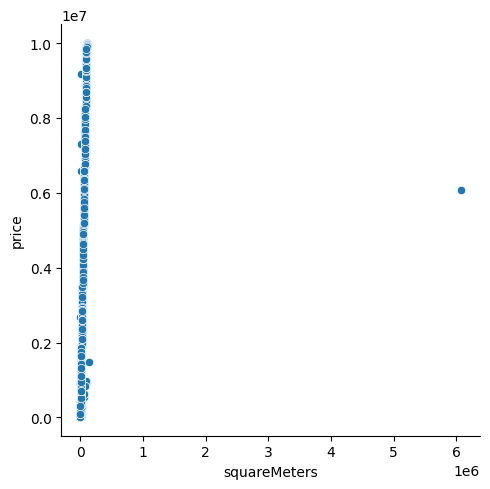

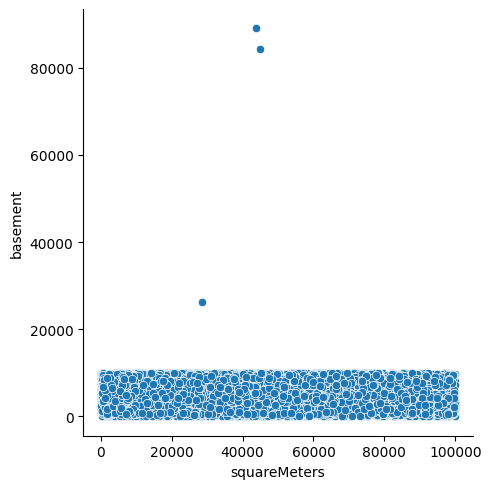

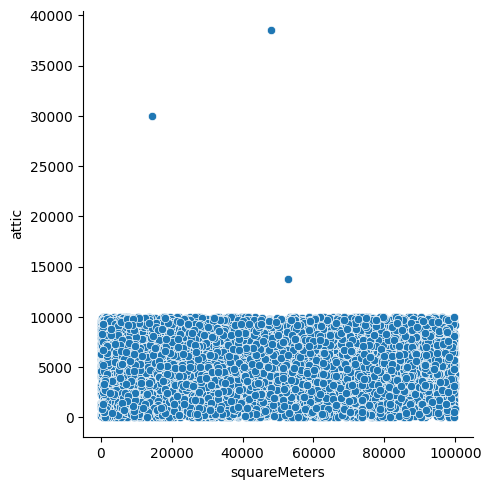

In [12]:
g = sns.relplot(x=train_df['squareMeters'],y=train_df['price'])

g = sns.relplot(x=test_df['squareMeters'],y=test_df['basement'])

g = sns.relplot(x=test_df['squareMeters'],y=test_df['attic'])

Train set- the last value looks like an outlier, thus, to be considered to be deleted.
Test set - basement vallues over 20000 to be deleted and attic values over 10000.

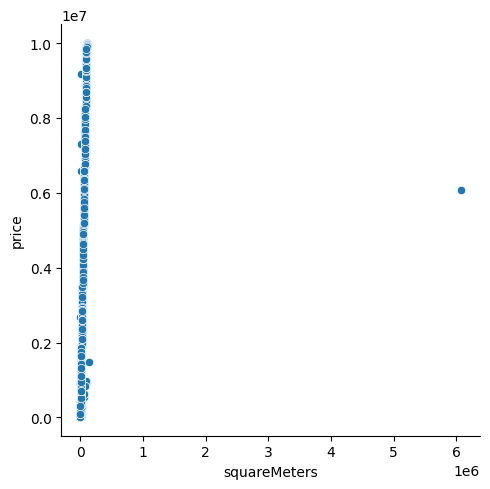

In [13]:
sns.relplot(data=train_df,x="squareMeters",y="price",sizes=(100,100))

We can see that the more square meters the house has, the higher its price is. There are some more outliers, which can be deleted, but for now let's leave them.

In [14]:
corr_matrix=train_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.00
squareMeters         0.59
made                 0.12
numberOfRooms        0.09
floors               0.06
cityCode             0.02
hasStormProtector    0.02
isNewBuilt           0.01
hasPool              0.01
hasStorageRoom       0.00
hasYard             -0.00
attic               -0.01
id                  -0.01
numPrevOwners       -0.01
hasGuestRoom        -0.01
cityPartRange       -0.01
basement            -0.03
garage              -0.12
Name: price, dtype: float64

After deleting the outlier in 'squareMeters' we can see that the distribution of this features looks much better. Additionally, this also provided greater correlation between this feature and the target.

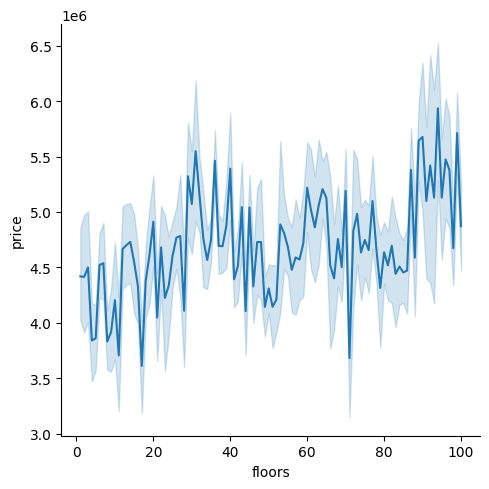

In [15]:
sns.relplot(data=train_df,x="floors",y="price",kind="line")

It seems there are some outliers in 'floors', especially the one aroud 70, but the distribution is not so linear, and the price is not so dependent on the number of floors, thus, it seems better to leave all data.

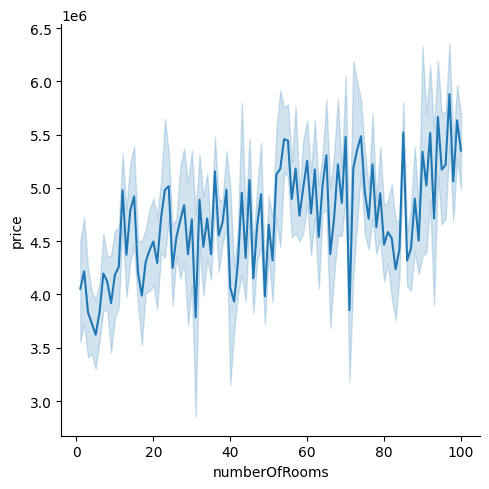

In [16]:
sns.relplot(data=train_df,x="numberOfRooms",y="price",sizes=(100,100),kind="line")

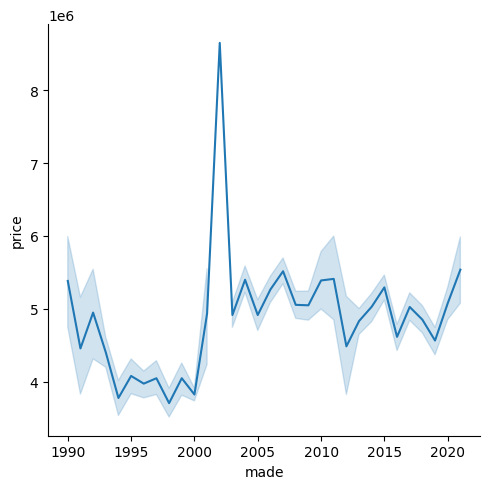

In [17]:
sns.relplot(data=train_df,x="made",y="price",sizes=(100,100),kind="line")

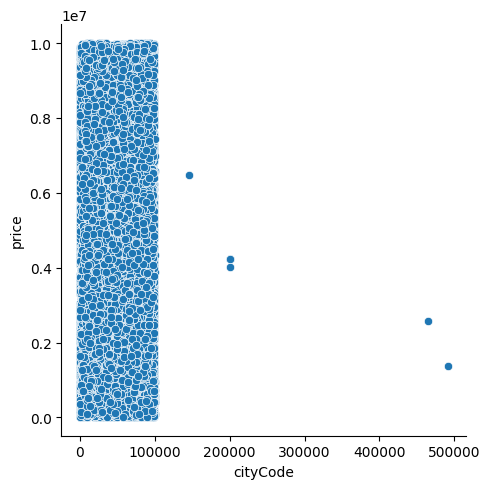

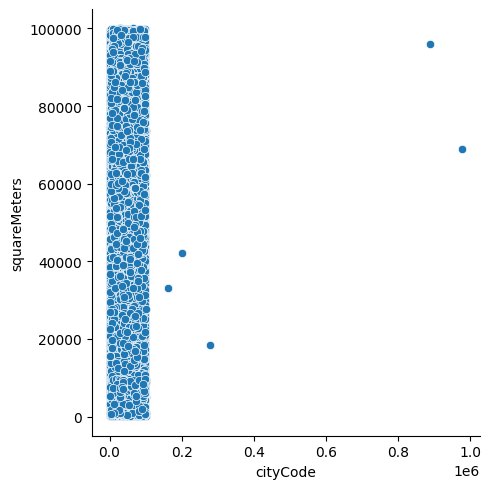

In [18]:
sns.relplot(data=train_df,x="cityCode",y="price",sizes=(100,100))

sns.relplot(data=test_df,x="cityCode",y="squareMeters",sizes=(100,100))

There are six in the train dataset and five in the test dataest striking outliers over 100,000 - city codes to be replaced excluding one 0 from the number, as the outliers look like errors during data collection.

In [19]:
train_df.replace({'cityCode': {201035: 20135, 491100: 49110, 465360:46536, 200812:20812, 146275: 14627, 200801: 20801}})
test_df.replace({'cityCode': {200801: 20801, 889795:88975, 977950: 97795, 279019: 27901, 162019:16209}})



,id,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,22730,47580,89,0,1,8,54830,5,3,1995,0,0,6885,8181,241,0,8,NaN
1,22731,62083,38,0,0,87,8576,10,3,1994,1,1,4601,9237,393,1,4,NaN
2,22732,90499,75,1,1,37,62454,9,6,1997,0,1,7454,2680,305,0,2,NaN
3,22733,16354,47,1,1,9,9262,6,5,2019,1,1,705,5097,122,1,5,NaN
4,22734,67510,8,0,0,55,24112,3,7,2014,1,1,3715,7979,401,1,9,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15149,37879,86184,74,1,1,73,14009,2,10,1993,1,0,3714,3894,665,1,1,NaN
15150,37880,45885,41,1,1,64,84208,4,5,2008,0,0,783,7628,976,0,0,NaN
15151,37881,73554,51,0,0,41,49263,10,5,2004,0,1,8207,1777,775,0,10,NaN
15152,37882,77604,51,0,1,33,67056,4,3,2019,0,0,9578,9706,135,0,2,NaN


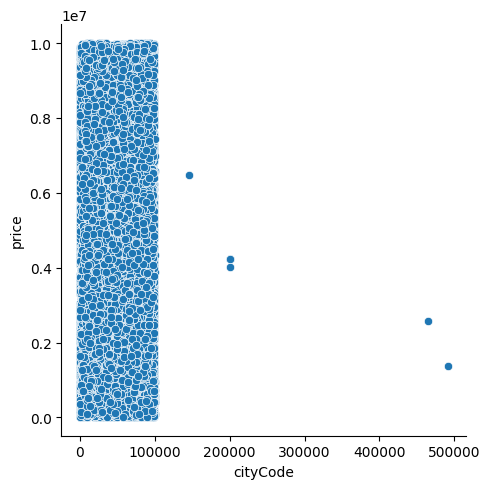

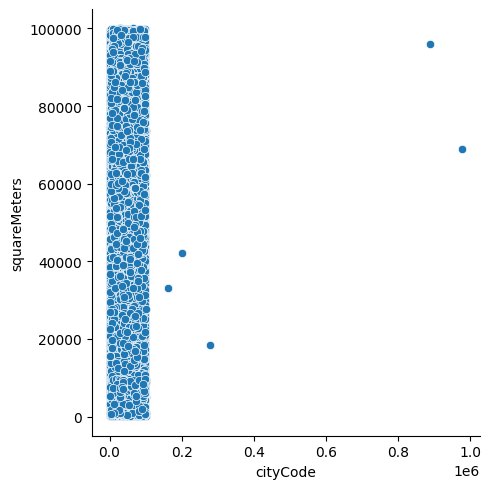

In [20]:
sns.relplot(data=train_df,x="cityCode",y="price",sizes=(100,100))

sns.relplot(data=test_df,x="cityCode",y="squareMeters",sizes=(100,100))

In [21]:
corr_matrix=train_df.corr()
corr_matrix["price"].sort_values(ascending=False)

price                1.00
squareMeters         0.59
made                 0.12
numberOfRooms        0.09
floors               0.06
cityCode             0.02
hasStormProtector    0.02
isNewBuilt           0.01
hasPool              0.01
hasStorageRoom       0.00
hasYard             -0.00
attic               -0.01
id                  -0.01
numPrevOwners       -0.01
hasGuestRoom        -0.01
cityPartRange       -0.01
basement            -0.03
garage              -0.12
Name: price, dtype: float64

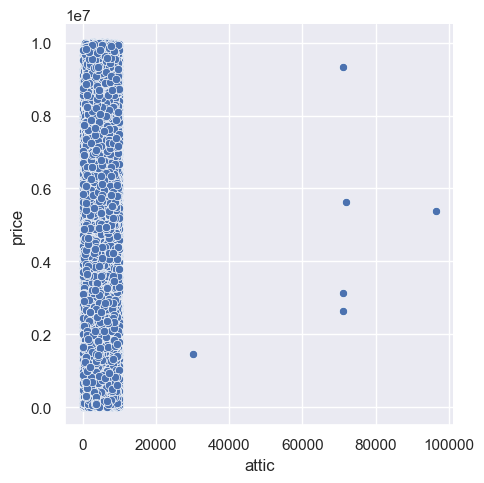

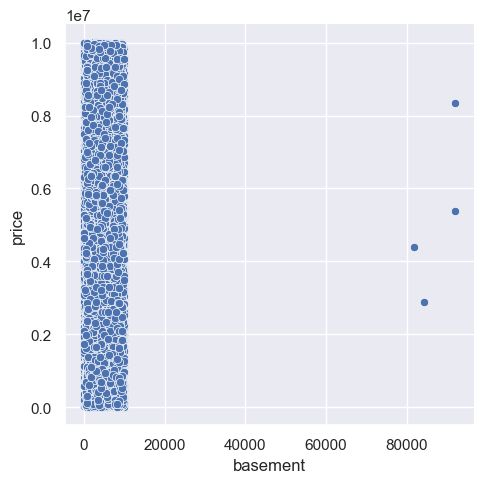

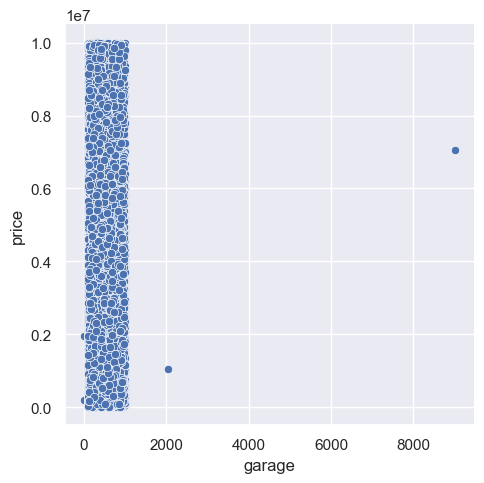

In [22]:
sns.set(style="darkgrid")

sns.relplot(data=train_df,x="attic",y="price",sizes=(100,100))

sns.relplot(data=train_df,x="basement",y="price",sizes=(100,100))

sns.relplot(data=train_df,x="garage",y="price",sizes=(100,100))

A few more outliers to be deleted: values higher than 20,000 in 'garage', 'attic', 'basement'. 'Basement' and 'attic' outliers look also like errors in data collections, as the values are greater than values of 'squareMeters'.

In [23]:
indices = (17629, 14878, 3828, 4909, 12858, 13633, 13642, 17168, 19994, 2107, 3995, 15068, 18926, 3130, 11910, 12367)

for i in indices:
    train_df.drop([i], axis=0, inplace=True)

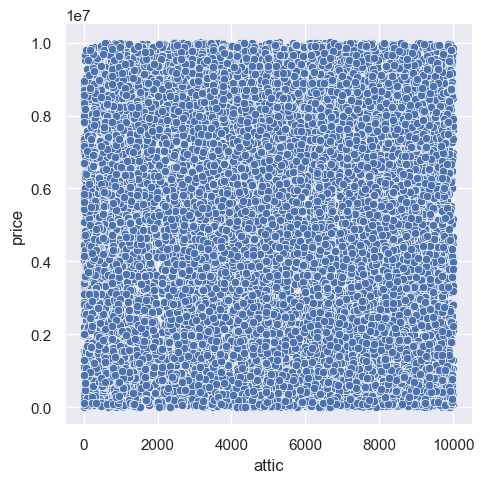

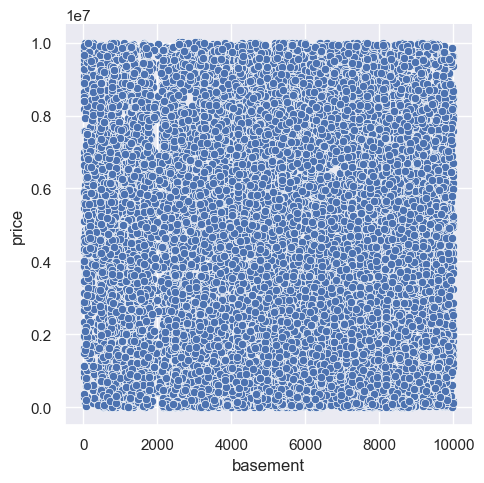

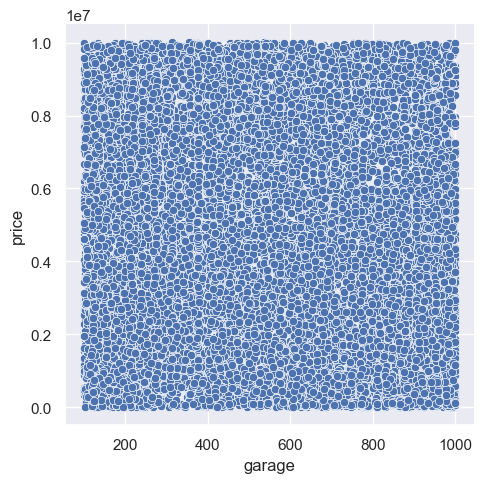

In [24]:
sns.relplot(data=train_df,x="attic",y="price",sizes=(100,100))

sns.relplot(data=train_df,x="basement",y="price",sizes=(100,100))

sns.relplot(data=train_df,x="garage",y="price",sizes=(100,100))

In [25]:
train_df.drop(columns=['id'], inplace=True)

In [26]:
from sklearn.model_selection import train_test_split

X = train_df.drop(["price"], axis = 1)
y = train_df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)

lr = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models_pred = lr.fit(X_train, X_test, y_train, y_test)
print(models_pred)

 26%|███████████████▍                                           | 11/42 [00:28<02:15,  4.36s/it]

GaussianProcessRegressor model failed to execute
Unable to allocate 2.16 GiB for an array with shape (17035, 17035) and data type float64


 79%|██████████████████████████████████████████████▎            | 33/42 [01:53<00:18,  2.02s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|███████████████████████████████████████████████████████████| 42/42 [02:47<00:00,  3.98s/it]

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1556
[LightGBM] [Info] Number of data points in the train set: 17035, number of used features: 16
[LightGBM] [Info] Start training from score 4618560.170051
(                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
XGBRegressor                                 1.00       1.00  204411.78   
GradientBoostingRegressor                    0.99       1.00  206265.27   
HistGradientBoostingRegressor                0.99       0.99  207715.62   
LGBMRegressor                                0.99       0.99  208565.65   
ExtraTreesRegressor                          0.99       0.99  211207.46   
RandomForestRegressor                        0.99       0.9

In [28]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

xgboost = XGBRegressor()

xgboost.fit(X_train, y_train)
xgboost.fit(X_test, y_test)

score_test = cross_val_score(xgboost, X_test, y_test)
print(score_test)
score_train = cross_val_score(xgboost, X_train, y_train)
print(score_train)



[0.99177045 0.99553292 0.99059599 0.99475092 0.99903995]
[0.99928521 0.99497489 0.99630648 0.99775498 0.99705056]
